In [2]:
from scapy.all import *
import numpy as np
import pandas as pd
import pickle as pk
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import csv
import time
import random
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
with open('dataset.pk', 'rb') as f:
    dataset = pk.load(f)

In [5]:
with open('Results/ex1/train_loss_hist.pk', 'rb') as f:
    train_loss_hist = pk.load(f)
with open('Results/ex1/train_acc_hist.pk', 'rb') as f:
    train_acc_hist = pk.load(f)
with open('Results/ex1/train_f1_hist.pk', 'rb') as f:
    train_f1_hist = pk.load(f)
with open('Results/ex1/train_cm_hist.pk', 'rb') as f:
    train_cm_hist = pk.load(f)

In [11]:
with open('Results/ex1/valid_loss_hist.pk', 'rb') as f:
    valid_loss_hist = pk.load(f)
with open('Results/ex1/valid_acc_hist.pk', 'rb') as f:
    valid_acc_hist = pk.load(f)
with open('Results/ex1/valid_f1_hist.pk', 'rb') as f:
    valid_f1_hist = pk.load(f)
with open('Results/ex1/valid_cm_hist.pk', 'rb') as f:
    valid_cm_hist = pk.load(f)

In [12]:
with open('Results/ex2/valid_loss_hist.pk', 'rb') as f:
    valid_loss_hist2 = pk.load(f)
with open('Results/ex2/valid_acc_hist.pk', 'rb') as f:
    valid_acc_hist2 = pk.load(f)
with open('Results/ex2/valid_f1_hist.pk', 'rb') as f:
    valid_f1_hist2 = pk.load(f)
with open('Results/ex2/valid_cm_hist.pk', 'rb') as f:
    valid_cm_hist2 = pk.load(f)

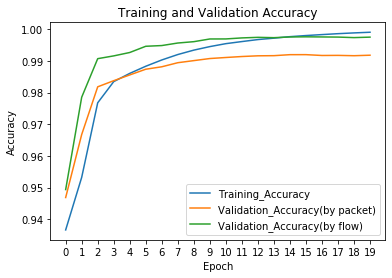

In [13]:
plt.plot([i for i in range(20)],train_acc_hist[0:20])
plt.plot([i for i in range(20)],valid_acc_hist[0:20])
plt.plot([i for i in range(20)],valid_acc_hist2[0:20])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20))
plt.title('Training and Validation Accuracy')
plt.legend(['Training_Accuracy','Validation_Accuracy(by packet)', 'Validation_Accuracy(by flow)'])

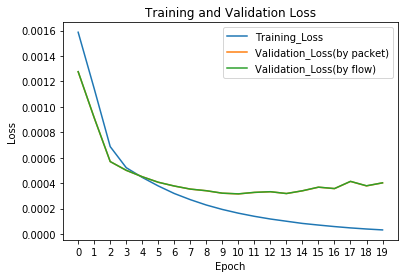

In [14]:
plt.plot([i for i in range(20)],train_loss_hist[0:20])
plt.plot([i for i in range(20)],valid_loss_hist[0:20])
plt.plot([i for i in range(20)],valid_loss_hist2[0:20])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0,20))
plt.title('Training and Validation Loss')
plt.legend(['Training_Loss','Validation_Loss(by packet)','Validation_Loss(by flow)'])

In [39]:
with open('Results/ex1/test_cm_8epoch.pk', 'rb') as f:
    test_cm_packet = pk.load(f)
with open('Results/ex2/test_cm_8epoch.pk', 'rb') as f:
    test_cm_flow = pk.load(f)

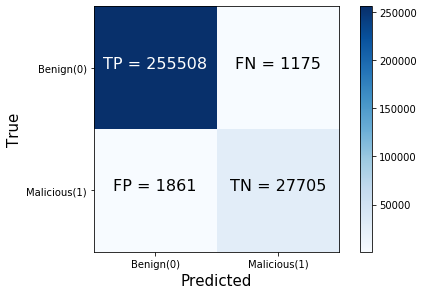

In [47]:
con_mat = np.array(test_cm_packet, dtype=np.int64)
plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.Blues)

plt.tight_layout()
plt.colorbar()
label=["Benign(0)", "Malicious(1)"] # 라벨값
tick_marks = np.arange(len(label)) 
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
# 표 안에 숫자 기입하는 방법
name = [['TP','FN'], ['FP', 'TN']]
thresh = con_mat.max() / 2.
for i in range(2):
     for j in range(2):
        plt.text(j, i, str(name[i][j])+" = "+str(con_mat[i, j]),
                 horizontalalignment="center",
                 color="white" if con_mat[i, j] > thresh else "black",
                 fontsize=16)
    
plt.show()

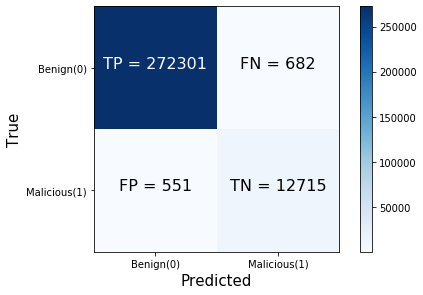

In [48]:
con_mat = np.array(test_cm_flow, dtype=np.int64)
plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.Blues)

plt.tight_layout()
plt.colorbar()
label=["Benign(0)", "Malicious(1)"] # 라벨값
tick_marks = np.arange(len(label)) 
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
# 표 안에 숫자 기입하는 방법
name = [['TP','FN'], ['FP', 'TN']]
thresh = con_mat.max() / 2.
for i in range(2):
     for j in range(2):
        plt.text(j, i, str(name[i][j])+" = "+str(con_mat[i, j]),
                 horizontalalignment="center",
                 color="white" if con_mat[i, j] > thresh else "black",
                 fontsize=16)
    
plt.show()